# NEFS Technology Division - Algorithmic Trading Project Template

### Description 

As a group, you have been tasked with researching, implementing and testing a profitable Foreign Exchange (Forex) trading strategy. The pair you have been assigned is GBP/USD.

Each group will have a number of Quants, Software Engineers and Product Managers. You will need to work as a team to allocate responsibilities for the duration of the project. e.g. a Product Manager may be incharge of setting up and maintaining the Jira backlog of tickets. 

You will be provided with a dataset that will allow you to develop and backtest your strategy. This dataset will provide you with all of the relevant data for a number of years. Your strategy will then be tested on a different timeframe to determine it's profitability (Profit/Loss). 

It may be useful to begin the task by trying to understand the 'bigger picture' of how each component of the project would come together i.e the strategy itself, the risk management system, the data and your testing systems.

You will be provided with an initial template to set out the fundamental components of your system, but you can feel free to expand on these as you wish. However, you need to be wary that your strategy **MUST** still be able to be backtested through the function included below. Please **DO NOT** modify this function in any way.

We have seperated your teams to include Analysts of different disciplines, skills and interests. You should capitalise on this to allow everyone to contribute to the project in the best way that they can. 

Some example roles you may want to have (you do not have to stick to these) : 

- Software Engineer 
- Quant Researcher 
- Quant Developer
- Algo Engineer
- Data Scientist
- Product Manager 

Information Links: 

- [Investopedia - Forex Trading](https://www.investopedia.com/terms/f/foreign-exchange.asp)
- [Investopedia - Forex (Definitions, How To and Examples)](https://www.investopedia.com/terms/f/forex.asp)
- [CME Group British Pound GBP/USD Overview](https://www.cmegroup.com/markets/fx/g10/british-pound.html)
- [Yahoo Finance GBP/USD Live Charts](https://finance.yahoo.com/quote/GBPUSD=X?p=GBPUSD=X&.tsrc=fin-srch)
- [Yahoo Finance USD/GBP Live Charts](https://finance.yahoo.com/quote/GBP=X?p=GBP=X&.tsrc=fin-srch)

#### Rules: 

Here are some rules to simplify this task. 

- You can only buy your positions in GBP and sell your positions in USD. 
- You can not leverage or borrow money to buy a position (no negative balances). If your wallet goes to 0 then something is wrong. 
- You can not sell a position you do not have (no shorting)
- When selling a position, you must sell all of the lots within that position. You can not off-load part of your position.


**What is a standard lot in Forex?**

A standard lot in Forex is equal to **100,000 currency units**. It’s the standard unit size for traders, whether independent or institutional.

If the GBP/USD exchange rate was $1.3000, one standard lot of the base currency (GBP) would be 130,000 units. This means, at the current price, you’d need 130,000 units of the quote currency (USD) to buy 100,000 units of GBP.

--- 

### Datasets

Under this section you will find that two initial datasets are being loaded to be used for this project. These datasets are: 

- GBP/USD Historical Prices between 01/01/2010 - 31/12/2020 (Daily)
- USD/GBP Historical Prices between 01/01/2010 - 31/12/2020 (Daily)

Through your research, you may also find that other datasets across the internet may prove useful in your strategy e.g. Geopolitical data, other currency pairs etc. Feel free to use such datasets to help improve your strategy if you would like to do so. 

In [45]:
#importing some popular packages that you may find useful

import pandas as pd 
import numpy as np 
import matplotlib as plt
from enum import Enum
from datetime import datetime
import uuid 
import string

In [46]:
complete_gbp_usd_dataset = pd.read_csv('GBPUSD_2010_2022.csv')
complete_usd_gbp_dataset = pd.read_csv('USDGBP_2010_2022.csv')

complete_gbp_usd_dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-01,1.618202,1.618202,1.613111,1.613294,1.613294,0.0
1,2010-01-04,1.613710,1.623904,1.606503,1.611370,1.611370,0.0
2,2010-01-05,1.611863,1.615587,1.597010,1.599079,1.599079,0.0
3,2010-01-06,1.599360,1.606323,1.594388,1.602384,1.602384,0.0
4,2010-01-07,1.602205,1.605858,1.590078,1.593397,1.593397,0.0
...,...,...,...,...,...,...,...
2865,2020-12-25,1.356963,1.361300,1.351534,1.355201,1.355201,0.0
2866,2020-12-28,1.357368,1.357773,1.343598,1.357239,1.357239,0.0
2867,2020-12-29,1.346566,1.352064,1.346185,1.346602,1.346602,0.0
2868,2020-12-30,1.349764,1.361748,1.349455,1.349990,1.349990,0.0


In [47]:
data = pd.DataFrame(complete_gbp_usd_dataset)
data['OSMA30'] = data['Open'].rolling(30).mean()
open_prices = data['Open']
dates = data['Date']
data.dropna(inplace=True)

### Portfolio 

Under this section you will find the boiler plate code for this task. This includes a class named 'portfolio' which will house key data around your trades such as your budget (monetary portfolio), net profit/loss, current positions and number of trades executed etc.

Each time you run a backtest of your strategy, this object will be reinstatiated and repopulated with the latest backtest results.

You **MUST NOT** modify this code in any way. If you suspect there is a bug, please let Ahmed know and he will look into resolving it.


## All of the backend code. DO NOT CHANGE THIS SECTION IN ANY WAY.

In [48]:
INITIAL_WALLET_CASH = 5000000
STANDARD_LOT = 100000

class Side(Enum):
    BUY = 'BUY'
    SELL = 'SELL'
    
class Currency(Enum):
    GBP = 'GBP'
    USD = 'USD'
    
class Position:
    def __init__(self,
                 date:datetime,
                 size:int,
                 price,
                 currency:Currency,
                 side:Side):
        
        self._id = str(uuid.uuid4())
        self._date = date
        self._currency = currency
        self._price = price
        self._size = size
        self._side = side
        
class Order:
    def __init__(self,
                 position:Position):
        self._id = str(uuid.uuid4())
        self._position = position
    
    def describe(self):
        return f"<Order id: {self._id} position: {self._position}>"

class Portfolio:
    
    def __init__(self):
        self.cash_wallet = INITIAL_WALLET_CASH  # wallet is in GBP
        self.current_positions = {}
        self.closed_positions = {}
    
    def add_position(self,position):
        self.current_positions[position._id] = position
        self.deduct_from_wallet(self.calculate_deduction(position))
                
    def sell_position(self,position:Position):
        self.current_positions.pop(position._id)
        self.closed_positions[position._id] = position
    
    def get_wallet_value(self):
        return self.cash_wallet
    
    def deduct_from_wallet(self,amount):
        self.cash_wallet -= amount
        
    def add_to_wallet(self,amount):
        self.cash_wallet += amount
        
    def calculate_fees(self,position:Position):
        fee = position._size * 2 #broker fee is £2 per standard lot 
        print("FEE CHARGED: £",fee)
        return fee 
    
    def calculate_total_cost_in_gbp(self,position:Position):
        if(position._currency == Currency.GBP):
            return position._price * (position._size * STANDARD_LOT)
        elif(position._currency == Currency.USD):
            return position._price * current_gbp_price  * (position._size * 100000) # x100000 for standard lot

    def calculate_deduction(self,position):
        return self.calculate_total_cost_in_gbp(position) + self.calculate_fees(position)
    

## You can edit from this point onwards 

In [49]:
## You can implement your strategy in this function.
## Feel free to create additional functions and call them from within the 'strategy' function
## As show in the example below, your function must return a dictionary of orders. 
## These orders will be run through the backtesting function
def strategy(data):
    
    FIXED_LOT_SIZE = 1
    wallet_value = INITIAL_WALLET_CASH
    
    # esentially requests to buy and sell
    orders = {}
    
    # essentially amount of the asset we own
    # long position = appreciate = buy to increase wallet price
    # short position = depreciate = sell to buy back at lower price
    positions = []
    
    # go through gbp/usd csv
    for index,row in data.iterrows():
                
        # CHECK IF A NEW POSITION CAN BE OPENED
        
        # BUY GBP TO SELL FOR USD - IF PRICE RISES WILL SELL GBP FOR HIGHER PRICE
        # if exchange opens lower than 1.5, potential increase in trading since exchange is relatively low
        # ...limits open open buy orders as part of risk management?
        # ...only open if there's enough money in wallet to cover it
        if(row["Open"] < 1.50 and len(orders) <= 500 and wallet_value >= row["Open"]*FIXED_LOT_SIZE*STANDARD_LOT):
            # get date
            date = datetime.strptime(str(row["Date"]),'%Y-%m-%d').date()
            
            # buy position
            buy_position = Position(date,FIXED_LOT_SIZE,row.Open,Currency.GBP,Side.BUY)
            buy_order = Order(buy_position)
            orders[buy_order._id] = buy_order # add order to wallet
            # amend wallet value
            wallet_value -= buy_position._size * STANDARD_LOT * buy_position._price
            # add long position to positions list
            positions.append(buy_position)
        
        # SELL GBP TO BUY FOR USD - IF PRICE FALLS WILL BUY BACK GBP FOR LOWER PRICE
        # if exchange opens above 1.6, can be considered high, indicator to sell
        # ...limit open sell orders to 1000 for risk management?
        # ...only open if there's enough money in wallet to cover it
        elif(row["Open"] > 1.6 and len(orders) <= 1000 and wallet_value >= row["Open"]*FIXED_LOT_SIZE*STANDARD_LOT):
            
            date = datetime.strptime(str(row["Date"]),'%Y-%m-%d').date()
            
            # sell position
            sell_position = Position(date,FIXED_LOT_SIZE,row.Open,Currency.USD,Side.SELL)
            sell_order = Order(sell_position)
            orders[sell_order._id] = sell_order
            # amend wallet value
            wallet_value -= sell_position._size * STANDARD_LOT * sell_position._price
            # add short position ot positions list
            positions.append(sell_position)
        
        
        # CHECK THROUGH OPEN POSITIONS
        
        if positions:
            for position in positions:
                # HIGH/BUY POSITIONS - EXPECTED TO INCREASE IN VALUE
                # sell if it is a buy position
                # ... and it is at lease 110% of its original value
                if position._side == Side.BUY and row["High"] >= position._price * 1.1:
                    sell_position = Position(datetime.strptime(str(row["Date"]),'%Y-%m-%d').date(),
                                             position._size, row["High"], Currency.GBP, Side.SELL)
                    sell_order = Order(sell_position)
                    orders[sell_order._id] = sell_order
                    
                    # amend wallet value
                    wallet_value += sell_position._size * STANDARD_LOT * (sell_position._price - position._price)
                    positions.remove(position)
                    
                # SHORT/SELL POSITIONS - EXPECTED TO DECREASE IN VALUE
                # sell if it is a sell position
                # ... and it is at least 98% of its original value
                elif position._side == Side.SELL and row["Low"] <= position._price * 0.98:
                    buy_position = Position(datetime.strptime(str(row["Date"]),'%Y-%m-%d').date(),
                                            position._size, row["Low"], Currency.GBP, Side.BUY)
                    buy_order = Order(buy_position)
                    orders[buy_order._id] = buy_order
                    
                    # amend wallet value
                    wallet_value += buy_position._size * STANDARD_LOT * (position._price - buy_position._price)
                    positions.remove(position)

   
    return orders

(Original Code For Reference)
```
def strategy(data):
    
    FIXED_LOT_SIZE = 1
    
    orders = {}
    
    for index,row in data.iterrows():
        
        if(row["Open"] < 1.50 and len(orders) <= 500):
            
            date = datetime.strptime(str(row["Date"]),'%Y-%m-%d').date()
            
            #if we have money available in the wallet, we can buy
            buy_position = Position(date,FIXED_LOT_SIZE,row.Open,Currency.GBP,Side.BUY)
            buy_order = Order(buy_position)
            orders[buy_order._id] = buy_order
    
        if(row["Open"] > 1.6 and len(orders) <= 1000):
            sell_position = Position(date,FIXED_LOT_SIZE,row.Open,Currency.GBP,Side.SELL)
            sell_order = Order(sell_position)
            orders[sell_order._id] = sell_order
   
    return orders
```

In [50]:
# You can use this function to backtest your strategy 
# The function will call your strategy and then execute the orders in the sequence you made them
# Once all of your orders have been completed, you will be shown your final wallet amount and your Profit/Loss.
def local_backtest_strategy(data):
    
    # Initialising the portfolio. £5,000,000 cash and no positions. 
    portfolio = Portfolio()
    order_queue = strategy(data) #calls your function to get all of the orders
    
    for index,order in order_queue.items():
    
        if(order._position._side == Side.BUY):
            # if you have enough cash, you can make the purchase 
            if portfolio.calculate_total_cost_in_gbp(order._position) <= portfolio.cash_wallet:
                portfolio.add_position(order._position)
                print(f"BUY ORDER FILLED : (ID) {str(order._id).upper()}")
            else: 
                print("BOOK CASH IS INSUFFICIENT")
                
        if(order._position._side == Side.SELL):
            # finding the position we want to sell from our current positions within portfolio
            matching_position  = next((position for position in portfolio.current_positions.values()
                                   if position._side == Side.BUY 
                                   and position._size == order._position._size 
                                   and position._price < order._position._price
                                   and position._date < order._position._date)
                                   ,None)
            
            if(matching_position != None):
                sale_earning = order._position._price * (order._position._size * STANDARD_LOT) 
                portfolio.add_to_wallet(sale_earning)
                portfolio.sell_position(matching_position)
                print(f"SELL ORDER FILLED : (ID) {str(order._id).upper()}")
            else:
                print("NO MATCHING POSITION FOUND")
    
    print("ALL ORDERS HAVE BEEN FILLED.")
    print("BOOK CASH LEVEL:", ("£%.2f" % portfolio.cash_wallet))
    
    pnl = portfolio.cash_wallet - INITIAL_WALLET_CASH 
    
    if(pnl < 0):
        print("TOTAL LOSS",("£%.2f" % abs(pnl)))
    else:
        print("TOTAL PROFIT",("£%.2f" % pnl))

local_backtest_strategy(data)

FEE CHARGED: £ 2
BUY ORDER FILLED : (ID) 4ECE4B8D-73C2-4A59-BC75-2AE33B81CD07
FEE CHARGED: £ 2
BUY ORDER FILLED : (ID) 2ACB573D-359A-4D52-9523-FAFD882B02A2
FEE CHARGED: £ 2
BUY ORDER FILLED : (ID) 495EEA73-A5FC-4FC1-AA3E-A8B694F353D2
FEE CHARGED: £ 2
BUY ORDER FILLED : (ID) 0F25DBFB-85F9-447B-B767-89F041686CC3
FEE CHARGED: £ 2
BUY ORDER FILLED : (ID) 64CB1E69-A113-4A06-9493-314D95C26266
FEE CHARGED: £ 2
BUY ORDER FILLED : (ID) 3D577EC0-2C61-435B-BBFC-30ED6A62C44D
FEE CHARGED: £ 2
BUY ORDER FILLED : (ID) 429282A7-7886-4D8D-B292-3EC2B44E6F93
FEE CHARGED: £ 2
BUY ORDER FILLED : (ID) 0A2AAF8A-CD5F-4FCD-8583-1120A0CD6C29
FEE CHARGED: £ 2
BUY ORDER FILLED : (ID) CD86A843-BFBF-4ADC-A4B5-F74AAEFA1CB5
FEE CHARGED: £ 2
BUY ORDER FILLED : (ID) 2C1E6F7E-9F27-4370-8F21-7E949820356F
FEE CHARGED: £ 2
BUY ORDER FILLED : (ID) 13988E1F-6319-466A-91A7-E4C8F730825B
FEE CHARGED: £ 2
BUY ORDER FILLED : (ID) E077149B-1809-4DF8-99A4-AEE41E9B3AA0
FEE CHARGED: £ 2
BUY ORDER FILLED : (ID) 6BC96073-D779-468C-AA3A

## Data Analysis and Research

You can include all of your data analysis and research under this section. Maybe some cool charts and formulas too?

Text(0, 0.5, 'Price (GBP/USD)')

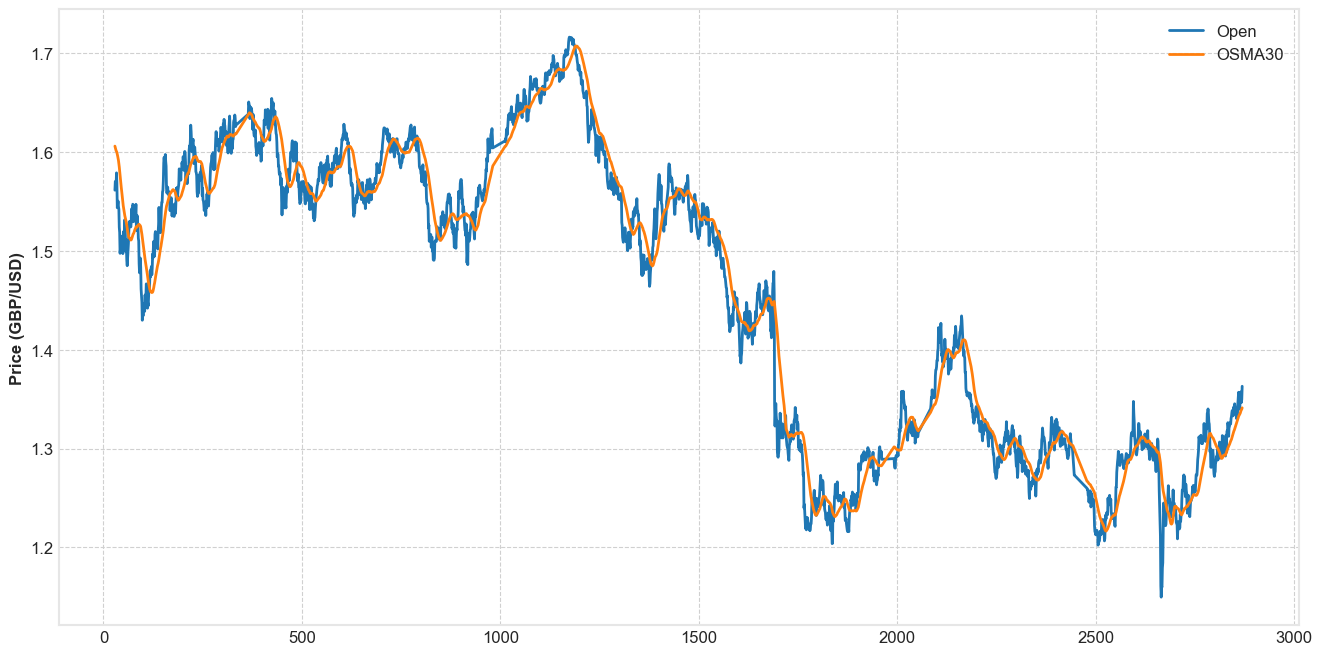

In [51]:
plot = data[['Open','OSMA30']].plot(label='GBP/USD',figsize=(16,8))
plot.set_ylabel("Price (GBP/USD)")

In [52]:
import mplfinance as mpl

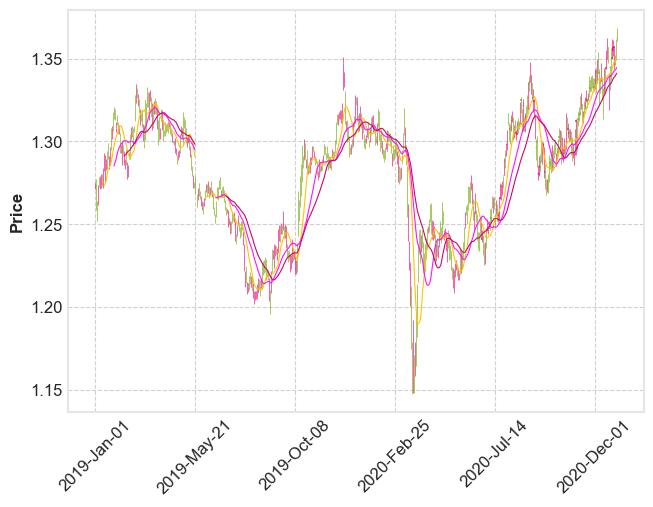

In [53]:
# READ CSV
data = pd.read_csv("GBPUSD_2010_2022.csv")

# CONVERT Date TO datetime
data.Date = pd.to_datetime(data.Date)

# SET DATE AS INDEX OF DATAFRAME
data = data.set_index('Date')

# PLOT GRAPH - moving averages
mpl.plot(data['2019':'2020'],
         type='candle',
         mav=(10,20,30),
         style='binance')

## Risk Management 

You can include your risk management process and functions (code) under this section.

In [54]:
def risk_manager():
    pass 